<a href="https://colab.research.google.com/github/sganguly3000ai/makemore/blob/main/makemore_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bigram character level language model**

# Import all neccessary packages

In [4]:
import torch
import numpy as np
import string
import matplotlib.pyplot as plt

# Create reference dictionaries for lookup


* Get all the lowercase characters of the English language in List format.
Enumerate the list to create a Dictionary of the characters (e.g. 'a': 1 etc) as stoi.stoi is a dictionary that is a cross reference between
the characters and their 'assigned' integer values.
* Significance of s:i+1.The enumeration starts from 0, but we want it to start from 1.

  Original stoi is {'a': 0, 'b': 1, ... , 'z': 26}. We want to shift the keys by 1 such that the resulting dictionary is like {'a': 1, 'b': 2, ..., 'z': 26}.

  This shifting along with the addition of a 'special character' explained below will allow the bigram plot to allign in a way that it is easily readable.
* Use a special character '.' to be used to signify the starting and ending character of every 'Name' word to be used as parameters ( later in the exercise ) to train this Bigram Character model
* The special character '.' is added to stoi with a index value of 0
* itos is the dictionary that provides the mapping from integer to character.
  itos is stoi with the value and key transposed






In [5]:
chars = list(string.ascii_lowercase)
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

# Get the data ready and train the model

*   Prepare a list of common (people) names as variable 'words'. Get it from a data source if possible by downloading and reading it in.

*   Initialize a torch.tensor N which will be used to store the counts of how many times one character follows another character in a name.

*   Iterate the list of names adding the special character '.' to the start and end of each name.

*   Iterate through the characters in the name (starting with the start special character and ending with the end special character) and identify two consecutive characters.
*   Convert the two characters (ch1 and ch2) to two integers (ix1 and ix2) by performing a lookup in the stoi dictionary.

*   Using the two integers (ix1 and ix2) as row and column index of the tensor N, we increment the increment the value of N[ix1,ix2] by 1.

*   Essentially we are recording the count of how many times the character (ch1) appeared before the character (ch2) in all of the names in the dataset to be used as the training data.










In [6]:
words = ['sumit','sorit','swapna','suraj','sujit', 'sujoy', 'manoj', 'amit',
         'kajol', 'steve', 'andrew','bob', 'cindy', 'ebrahim', 'daku', 'johny',
         'timmy', 'david', 'tarun', 'nancy', 'edith', 'jason', 'kyle', 'joseph',
         'kimberly', 'emma', 'irene', 'michael', 'scott', 'valentino']
N = torch.zeros((27,27) , dtype = torch.int32)
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] += 1

# Plot the model data for visulizing

(-0.5, 26.5, 26.5, -0.5)

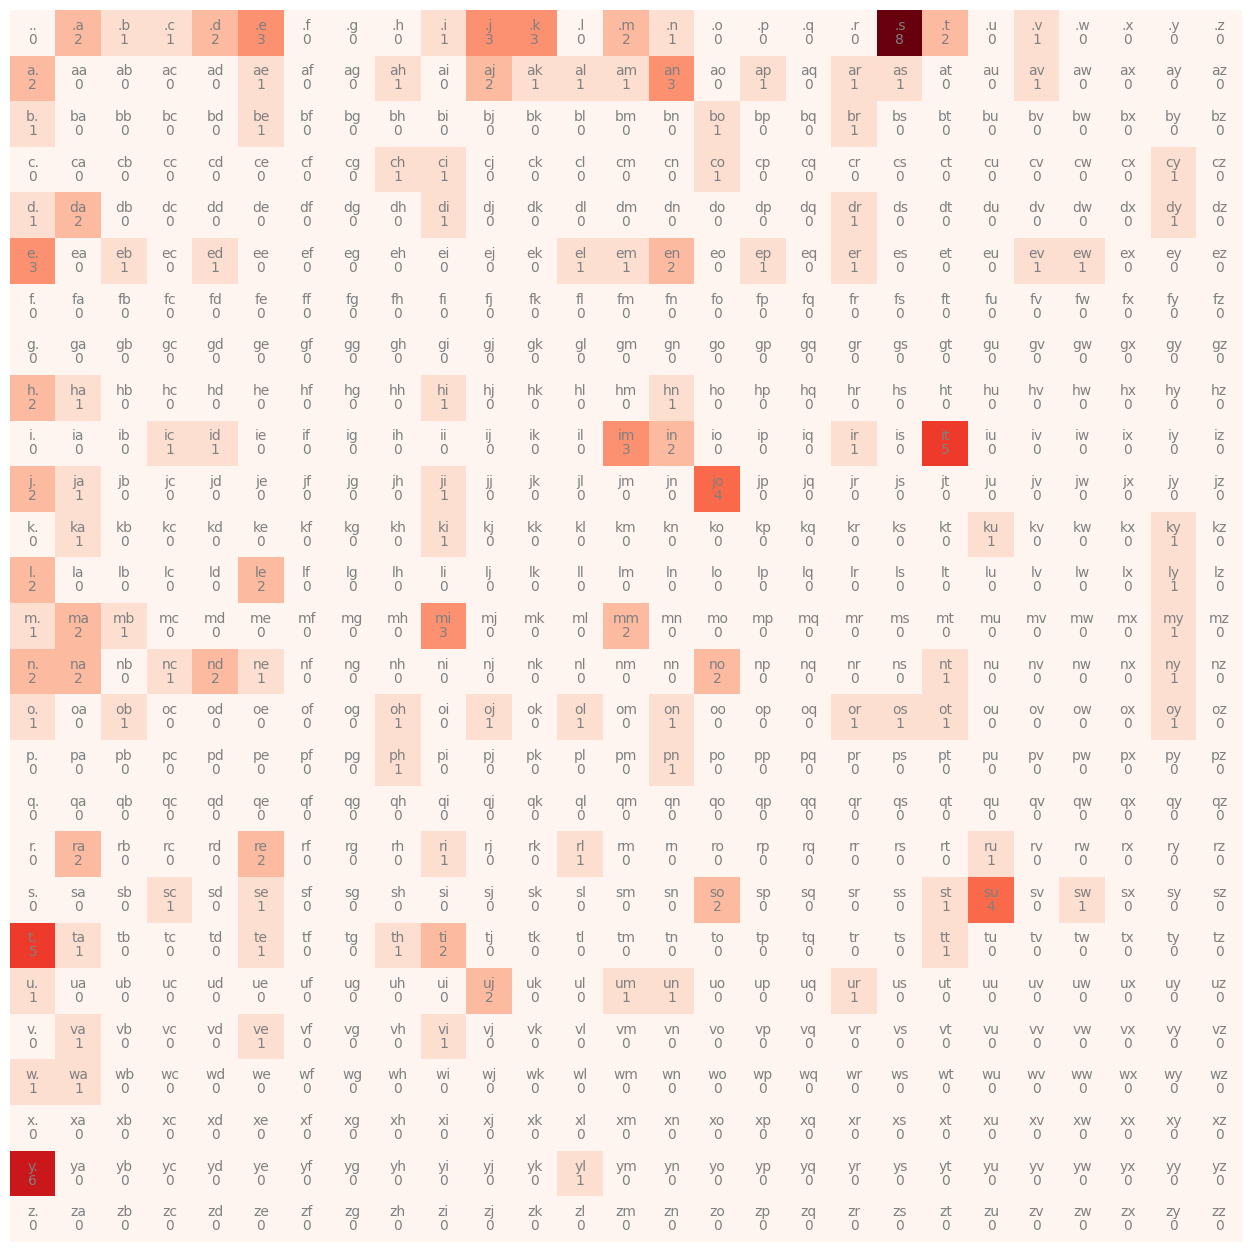

In [7]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Reds')

for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos [j]
    plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
    plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')

# Lets find the probability of the bigrams

In [8]:
P = N.float()
D = P.sum(1, keepdim = True)
# If the sum of the items in the row is 0, then set it to 1 to avoid division by 0
for d in D:
  if d[0]==0.0:
    d[0]= 1.0
P /= D

# Sampling


*   torch.multinomial generates sample integer based on probabilities that are fed to the function

*   These integers are the index to the probability tensor P


*   The out list is being appended with the character equivalent of the index number thst the model is generating based on its training. The generation stops when the index value generated is 0 (indicating the end of a generated name).









In [9]:
g = torch.Generator().manual_seed(2147483647)
print (f'GENERATED NAMES BY THE BIGRAM MODEL')
print (f'===================================\n')
for i in range(10):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print (''.join(out))

GENERATED NAMES BY THE BIGRAM MODEL

j.
nobedit.
akah.
sujobrincimimahinttitimasoteve.
swanakurandaevicit.
bonthitimbredrin.
evitarebobevedaj.
jimitth.
mboy.
sujah.


#Find the loss

In [12]:
log_likelihood = 0.0
n = 0
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print (f'{log_likelihood=}')
#negetive log_likelihood
nll = -log_likelihood
print (f'{nll=}')
print (f'{nll/n}') # loss

.s: 0.2667 -1.3218
su: 0.4000 -0.9163
um: 0.1667 -1.7918
mi: 0.3000 -1.2040
it: 0.3846 -0.9555
t.: 0.4545 -0.7885
.s: 0.2667 -1.3218
so: 0.2000 -1.6094
or: 0.1000 -2.3026
ri: 0.1429 -1.9459
it: 0.3846 -0.9555
t.: 0.4545 -0.7885
.s: 0.2667 -1.3218
sw: 0.1000 -2.3026
wa: 0.5000 -0.6931
ap: 0.0625 -2.7726
pn: 0.5000 -0.6931
na: 0.1667 -1.7918
a.: 0.1250 -2.0794
.s: 0.2667 -1.3218
su: 0.4000 -0.9163
ur: 0.1667 -1.7918
ra: 0.2857 -1.2528
aj: 0.1250 -2.0794
j.: 0.2500 -1.3863
.s: 0.2667 -1.3218
su: 0.4000 -0.9163
uj: 0.3333 -1.0986
ji: 0.1250 -2.0794
it: 0.3846 -0.9555
t.: 0.4545 -0.7885
.s: 0.2667 -1.3218
su: 0.4000 -0.9163
uj: 0.3333 -1.0986
jo: 0.5000 -0.6931
oy: 0.1000 -2.3026
y.: 0.8571 -0.1542
.m: 0.0667 -2.7081
ma: 0.2000 -1.6094
an: 0.1875 -1.6740
no: 0.1667 -1.7918
oj: 0.1000 -2.3026
j.: 0.2500 -1.3863
.a: 0.0667 -2.7081
am: 0.0625 -2.7726
mi: 0.3000 -1.2040
it: 0.3846 -0.9555
t.: 0.4545 -0.7885
.k: 0.1000 -2.3026
ka: 0.2500 -1.3863
aj: 0.1250 -2.0794
jo: 0.5000 -0.6931
ol: 0.1000 -

# Check the probability and loss for any given word

In [25]:
log_likelihood = 0.0
n = 0
for w in ['steve']:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print (f'{log_likelihood=}')
#negetive log_likelihood
nll = -log_likelihood
print (f'{nll=}')
print (f'{nll/n}') # loss

.s: 0.2667 -1.3218
st: 0.1000 -2.3026
te: 0.0909 -2.3979
ev: 0.0769 -2.5649
ve: 0.3333 -1.0986
e.: 0.2308 -1.4663
log_likelihood=tensor(-11.1521)
nll=tensor(11.1521)
1.858689308166504


# Model smoothing


*   The loss is infinite for some names that the model has 0 probability of predicting
*   In order to alleviate this infinite loss this model can be smoothed out by adding some positive values to the probability



In [29]:

# here we are adding 1 to every bigram count
# any number can be added
P = (N+1).float()
D = P.sum(1, keepdim = True)
# If the sum of the items in the row is 0, then set it to 1 to avoid division by 0
for d in D:
  if d[0]==0.0:
    d[0]= 1.0
P /= D

g = torch.Generator().manual_seed(2147483647)
print (f'GENERATED NAMES BY THE BIGRAM MODEL')
print (f'===================================\n')
for i in range(10):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print (''.join(out))

log_likelihood = 0.0
n = 0
for w in ['chico']:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print (f'{log_likelihood=}')
#negetive log_likelihood
nll = -log_likelihood
print (f'{nll=}')
print (f'{nll/n}') # loss

GENERATED NAMES BY THE BIGRAM MODEL

juwjdvditkaqaz.
p.
cfqywacny.
kuitrltohcogsjgwzvudahntauy.
bilevhajkdbdainrwimbl.
snjyinaylaftezffvmumthyfodtumj.
pfytsuwjhruanq.
core.
ysezocfky.
jabdywebfmiifmwyfin.
.c: 0.0351 -3.3499
ch: 0.0645 -2.7408
hi: 0.0625 -2.7726
ic: 0.0500 -2.9957
co: 0.0645 -2.7408
o.: 0.0541 -2.9178
log_likelihood=tensor(-17.5177)
nll=tensor(17.5177)
2.9196126461029053


# Complete model code

In [ ]:
# Import all required packages

import torch
import numpy as np
import string
import matplotlib.pyplot as plt

# Create dictionaries as character lookup and translation to integer
# This is required since strings cannot be stored in tensors

chars = list(string.ascii_lowercase)
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

# Create a list of common names. Preferably one should find a dataset of names online

words = ['sumit','sorit','swapna','suraj','sujit', 'sujoy', 'manoj', 'amit',
         'kajol', 'steve', 'andrew','bob', 'cindy', 'ebrahim', 'daku', 'johny',
         'timmy', 'david', 'tarun', 'nancy', 'edith', 'jason', 'kyle', 'joseph',
         'kimberly', 'emma', 'irene', 'michael', 'scott', 'valentino']

# Tensor N will hold the raw counts of the Bigram

N = torch.zeros((27,27) , dtype = torch.int32)
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] += 1

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Reds')

for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos [j]
    plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
    plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')

P = N.float()
D = P.sum(1, keepdim = True)
# If the sum of the items in the row is 0, then set it to 1 to avoid division by 0
for d in D:
  if d[0]==0.0:
    d[0]= 1.0
P /= D

g = torch.Generator().manual_seed(2147483647)
print (f'GENERATED NAMES BY THE BIGRAM MODEL')
print (f'===================================\n')
for i in range(10):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print (''.join(out))

log_likelihood = 0.0
n = 0
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print (f'{log_likelihood=}')
#negetive log_likelihood
nll = -log_likelihood
print (f'{nll=}')
print (f'{nll/n}') # loss